<a href="https://colab.research.google.com/github/borrowedbirch05/Fast.AI/blob/main/3vs7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecting 3 vs 7

# Imports

In [1]:
#imports

! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

# Dataset Download

In [2]:
# download Dataset

path = untar_data(URLs.MNIST_SAMPLE)

Path.BASE_PATH = path

path.ls()

(#3) [Path('train'),Path('labels.csv'),Path('valid')]

In [13]:
threes = (path/'train'/'3').ls()
sevens = (path/'train'/'7').ls()

# Creating a Baseline

In [14]:
#Pixel Similarity

In [17]:
seven_tensors = [tensor(Image.open(img)) for img in sevens]
three_tensors = [tensor(Image.open(img)) for img in threes]

In [57]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

In [21]:
three_tensors[0].shape

torch.Size([28, 28])

In [42]:
stack = torch.stack(seven_tensors).float()/255

In [ ]:
stack

In [44]:
stack_mean = torch.mean(stack, 0)

<Axes: >

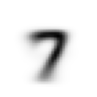

In [46]:
show_image(stack_mean)

In [49]:
def get_average(tensor_list):
  return torch.mean(torch.stack(tensor_list).float()/255, 0)

In [50]:
mean3 = get_average(three_tensors)
mean7 = get_average(seven_tensors)

<Axes: >

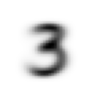

In [51]:
show_image(mean3)

<Axes: >

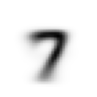

In [52]:
show_image(mean7)

In [ ]:
dist_3_abs = (mean3 - img).abs().mean(). # F.l1_loss
dist_3_sq = (mean3-img)**2.mean().sqrt() # F.mse_loss.sqrt()

In [53]:
valid_3_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [62]:
def mnist_distance(img1, img2):
  return F.l1_loss(img1, img2)

In [67]:
#test
a_3 = stacked_threes[1]
mnist_distance(mean3, a_3.float())

tensor(0.1251)

In [68]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)

In [69]:
valid_3_dist, valid_3_dist.shape

(tensor([0.1153, 0.1402, 0.1262,  ..., 0.1523, 0.1470, 0.1298]),
 torch.Size([1010]))

In [70]:
def is_3(inp) :
  return mnist_distance(inp, mean3) < mnist_distance(inp, mean7)

In [73]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = 1-is_3(valid_7_tens).float().mean()

In [74]:
accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2


(tensor(0.9168), tensor(0.9854), tensor(0.9511))

#Stochastic Gradient Descent